# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #11</span>

Durante l'undicesima lezione teorica, abbiamo avuto modo di introdurre le basi del Machine Learning, un campo legato all'apprendimento automatico della macchina e alla capacità di fare predizioni a partire da un campione di dati forniti in ingresso. In particolare, all'interno dell'esercitazione, ci siamo concentrati sul concetto di reti neurali (**Neural Networks**) per il *Supervised Learning*, una categoria di apprendimento basata sull'utilizzo di dati etichettati (*input* e *output*), a partire dai quali il computer deve essere in grado di generare un programma capace di fare predizioni sufficientemente accurate su eventuali nuovi dati forniti come input. Abbiamo infatti visto come, grazie ad alcuni ingredienti fondamentali ($i.e.$ funzione di attivazione, ottimizzaztore e funzione costo), sia possibile simulare la struttura semplificata di una rete neurale, che può essere successivamente utilizzata per predire nuovi risultati a partire da un dataset di input. La libreria alla quale abbiamo fatto riferimento durante lo svolgimento dell'esercitazione è stata <font face = "Courier"> tensorflow </font> di <font face = "Courier"> Keras </font>.

### <span style="color:darkorange"> Esercizio 11.1</span>

Il primo esercizio serviva a fare pratica con il concetto di Machine Learning Regression e reti neurali, studiando la loro applicazione a un problema relativamente semplice: dataset $(x,y)$ generato seguendo una distribuzione lineare disturbata con un rumore di tipo gaussiano (*gaussian noise*):

$$
    y= f(x) + \sigma,
$$

con

$$
f(x)=2x+1
$$

Nello specifico, partendo da un codice di base precedentemente fornito, ho dovuto studiare le capacità di predizione della rete neurale in funzione dei seguenti parametri caratteristici:

- il numero di punti contenuti nel dataset di training $N_{\mathrm{train}}$;
- il numero di epoche $N_{\mathrm{epochs}}$;
- il rumore gaussiano $\sigma$.

Per prima cosa, ho studiato l'andamento rispetto a $N_{\mathrm{train}}$, tenendo fissati gli altri due parametri: $N_{\mathrm{epochs}} = 30$ e $\sigma=0$. Ho quindi generato il mio dataset iniziale costituito da $N_{\mathrm{train}} = 50$ e $N_{\mathrm{valid}} = 10$ dati, distribuiti in modo uniforme nell'intervallo $[-1,1]$, che ho successivamente etichettato utilizzando l'espressione per il calcolo di $y$ soprariportata, trascurando l'eventuale rumore $(\sigma=0)$ di modo che i dati si disponessero esattamente lungo la retta designata.

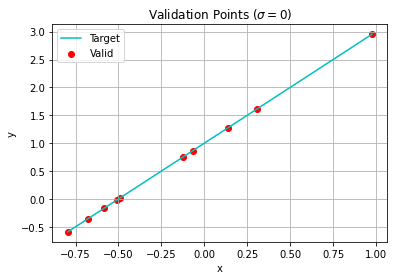

In [ ]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)

x_train = np.random.uniform(-1, 1, 50)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure()
plt.plot(x_valid, y_target, color='c',label='Target')
plt.scatter(x_valid, y_valid, color='r',label='Valid')
plt.title('Validation Points $(\sigma=0)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

A questo punto, ho generato la mia rete neurale utilizzando il <font face = "Courier"> Sequential Model </font> di <font face = "Courier"> Keras </font> e implementando un singolo layer costituito da un solo neurone. Il modello è stato poi compilato scegliendo come ottimizzatore lo *Stochastic Gradient Descendent* (SGD) e come funzione costo e metrica la *Mean Squared Error* (MSE).

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Prima di proseguire con la descrizione, è importante sottolineare che la possibilità di utilizzare una struttura neurale così semplificata, per risolvere questo particolare problema, è attribuibile al fatto che già un singolo neurone è in grado di eseguire un fit tramite l'ottimizzazione di due parametri (*weight* e *bias*). Di conseguenza, dovendo fittare un campione di dati che segue un andamento di tipo lineare, mi aspetto che sia sufficiente costruire una NN composta da un singolo neurone, in quanto i parametri che definiscono univocamente una retta sono esattamente due, $i.e.$ coefficiente angolare ed intercetta. 

Fissato il numero di epoche, ho quindi avviato il processo di fitting della NN.

In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
2/2 [==============================] - 0s 76ms/step - loss: 2.9399 - mse: 2.9399 - val_loss: 1.6867 - val_mse: 1.6867
Epoch 2/30
2/2 [==============================] - 0s 16ms/step - loss: 2.7842 - mse: 2.7842 - val_loss: 1.6115 - val_mse: 1.6115
Epoch 3/30
2/2 [==============================] - 0s 15ms/step - loss: 2.6504 - mse: 2.6504 - val_loss: 1.5465 - val_mse: 1.5465
Epoch 4/30
2/2 [==============================] - 0s 17ms/step - loss: 2.5256 - mse: 2.5256 - val_loss: 1.4831 - val_mse: 1.4831
Epoch 5/30
2/2 [==============================] - 0s 16ms/step - loss: 2.4022 - mse: 2.4022 - val_loss: 1.4180 - val_mse: 1.4180
Epoch 6/30
2/2 [==============================] - 0s 22ms/step - loss: 2.2803 - mse: 2.2803 - val_loss: 1.3606 - val_mse: 1.3606
Epoch 7/30
2/2 [==============================] - 0s 17ms/step - loss: 2.1735 - mse: 2.1735 - val_loss: 1.3100 - val_mse: 1.3100
Epoch 8/30
2/2 [==============================] - 0s 15ms/step - loss: 2.0746 - mse: 2.0746 - val

In [ ]:
# return weights
model.get_weights()

[array([[0.4240804]], dtype=float32), array([0.797436], dtype=float32)]

Le quantità soprariportate rappresentano rispettivamente il coefficiente angolare e l'intercetta della retta ottenuti dal processo di ottimizzazione. Vediamo subito come questi tendano a discostarsi parecchio dai valori attesi. Ciò è dovuto principalmente alla scarsità di dati utilizzati per il training del modello.

Di seguito ho riportato l'andamento, al variare del numero di epoche, della funzione costo sia per il dataset di training che per quello di validation, mentre accanto è mostrata la curva ottenuta applicando la capacità predittiva acquisita dal sistema.

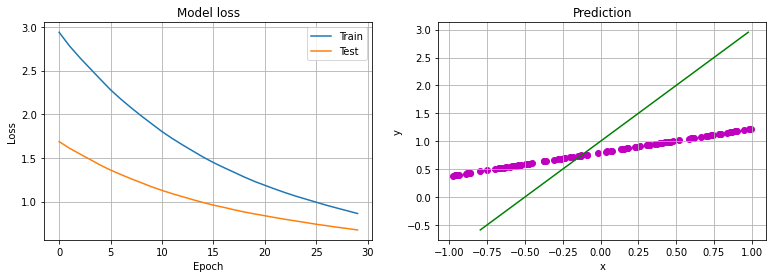

In [ ]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.subplot(132)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Dal plot di destra possiamo osservare direttamente come la capacità predittiva acquisita dal mio modello sia molto scarsa e tutt'altro che efficiente, di conseguenza, nella seconda simulazione, ho deciso di aumentare il numero di dati utilizzati per allenare la mia NN, lasciando tutti gli altri parametri inalterati. Nello specifico ho impostato: $N_{train}=100$ e $N_{valid}=10$.

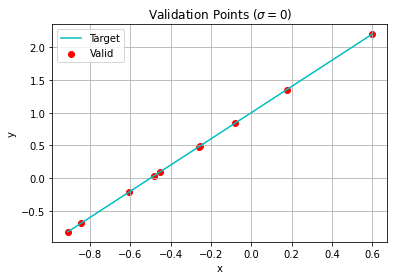

In [ ]:
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure()
plt.plot(x_valid, y_target, color='c',label='Target')
plt.scatter(x_valid, y_valid, color='r',label='Valid')
plt.title('Validation Points $(\sigma=0)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 0s 20ms/step - loss: 2.4172 - mse: 2.4172 - val_loss: 0.8549 - val_mse: 0.8549
Epoch 2/30
4/4 [==============================] - 0s 8ms/step - loss: 2.1827 - mse: 2.1827 - val_loss: 0.7865 - val_mse: 0.7865
Epoch 3/30
4/4 [==============================] - 0s 8ms/step - loss: 1.9967 - mse: 1.9967 - val_loss: 0.7288 - val_mse: 0.7288
Epoch 4/30
4/4 [==============================] - 0s 10ms/step - loss: 1.8386 - mse: 1.8386 - val_loss: 0.6699 - val_mse: 0.6699
Epoch 5/30
4/4 [==============================] - 0s 8ms/step - loss: 1.6717 - mse: 1.6717 - val_loss: 0.6322 - val_mse: 0.6322
Epoch 6/30
4/4 [==============================] - 0s 8ms/step - loss: 1.5652 - mse: 1.5652 - val_loss: 0.5893 - val_mse: 0.5893
Epoch 7/30
4/4 [==============================] - 0s 8ms/step - loss: 1.4351 - mse: 1.4351 - val_loss: 0.5554 - val_mse: 0.5554
Epoch 8/30
4/4 [==============================] - 0s 7ms/step - loss: 1.3325 - mse: 1.3325 - val_loss:

In [ ]:
# return weights
model.get_weights()

[array([[1.1236101]], dtype=float32), array([0.90365267], dtype=float32)]

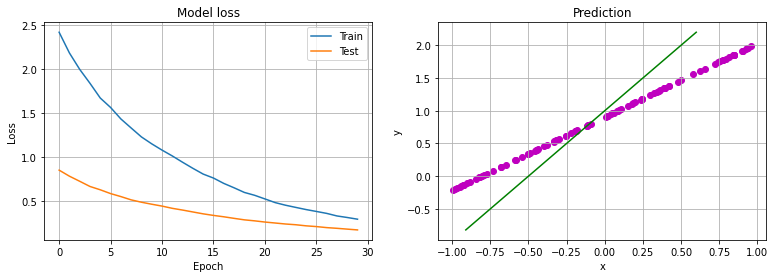

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.subplot(132)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Dal plot di destra possiamo vedere come, nonostante l'efficienza delle predizioni fornite dalla rete neurale sia maggiore rispetto alla simulazione precedente, i valori predetti tendano a disporsi lungo una retta visibilmente differente da quella attesa. Possiamo accorgerci di ciò anche andando a vedere i valori, riportati sopra, dei parametri ottenuti dal fit. 

Per la terza simulazione ho quindi aumentato nuovamente le dimensioni del dataset di input: $N_{train}=200$ e $N_{valid}=20$.

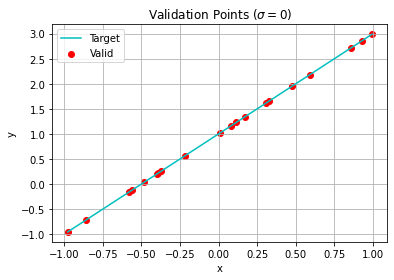

In [ ]:
x_train = np.random.uniform(-1, 1, 200)
x_valid = np.random.uniform(-1, 1, 20)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure()
plt.plot(x_valid, y_target, color='c',label='Target')
plt.scatter(x_valid, y_valid, color='r',label='Valid')
plt.title('Validation Points $(\sigma=0)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
7/7 [==============================] - 0s 12ms/step - loss: 1.5356 - mse: 1.5356 - val_loss: 1.2008 - val_mse: 1.2008
Epoch 2/30
7/7 [==============================] - 0s 5ms/step - loss: 1.2293 - mse: 1.2293 - val_loss: 0.9503 - val_mse: 0.9503
Epoch 3/30
7/7 [==============================] - 0s 5ms/step - loss: 0.9774 - mse: 0.9774 - val_loss: 0.7589 - val_mse: 0.7589
Epoch 4/30
7/7 [==============================] - 0s 5ms/step - loss: 0.7836 - mse: 0.7836 - val_loss: 0.6175 - val_mse: 0.6175
Epoch 5/30
7/7 [==============================] - 0s 5ms/step - loss: 0.6388 - mse: 0.6388 - val_loss: 0.5005 - val_mse: 0.5005
Epoch 6/30
7/7 [==============================] - 0s 5ms/step - loss: 0.5189 - mse: 0.5189 - val_loss: 0.4190 - val_mse: 0.4190
Epoch 7/30
7/7 [==============================] - 0s 5ms/step - loss: 0.4339 - mse: 0.4339 - val_loss: 0.3513 - val_mse: 0.3513
Epoch 8/30
7/7 [==============================] - 0s 5ms/step - loss: 0.3633 - mse: 0.3633 - val_loss: 

In [ ]:
# return weights
model.get_weights()

[array([[1.6990354]], dtype=float32), array([1.0124568], dtype=float32)]

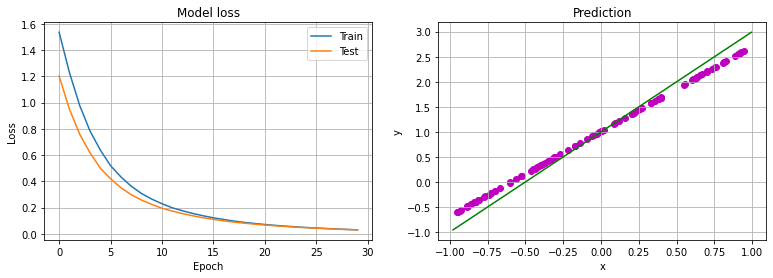

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.subplot(132)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Notiamo come i dati si dispongano lungo una retta con un andamento prossimo a quello richiesto dal dataset di partenza, in accordo col fatto che, aumentando il numero di dati di training, la rete neurale ha a disposizione una quantità d'informazione maggiore su cui fare esperienza. 

Infine, l'ultima simulazione, associata allo studio dell'andamento della capacità predittiva della NN in funzione del numero di dati di training, è stata eseguita impostando: $N_{train}=500$ e $N_{valid}=50$.

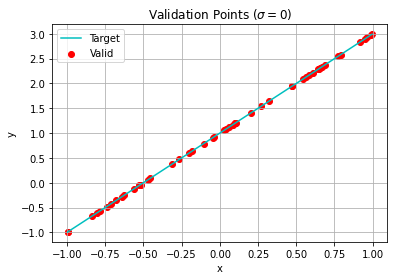

In [ ]:
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure()
plt.plot(x_valid, y_target, color='c',label='Target')
plt.scatter(x_valid, y_valid, color='r',label='Valid')
plt.title('Validation Points $(\sigma=0)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 6ms/step - loss: 1.1529 - mse: 1.1529 - val_loss: 1.0786 - val_mse: 1.0786
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7475 - mse: 0.7475 - val_loss: 0.7192 - val_mse: 0.7192
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5051 - mse: 0.5051 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3572 - mse: 0.3572 - val_loss: 0.3599 - val_mse: 0.3599
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2622 - mse: 0.2622 - val_loss: 0.2649 - val_mse: 0.2649
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1967 - mse: 0.1967 - val_loss: 0.1993 - val_mse: 0.1993
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1536 - val_mse: 0.1536
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.11

In [ ]:
# return weights
model.get_weights()

[array([[1.9492497]], dtype=float32), array([0.9968168], dtype=float32)]

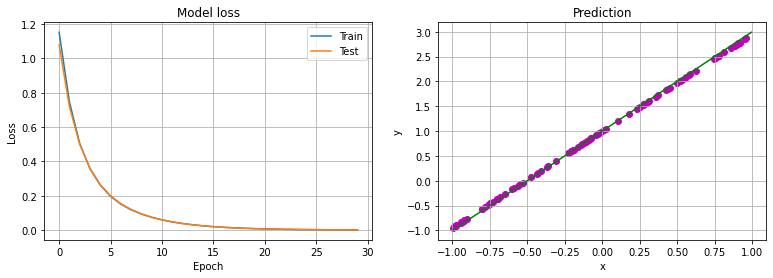

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.subplot(132)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Come ci si poteva aspettare, una volta aumentata a sufficienza la dimensione del dataset di training, il grado di precisione dei valori predetti diventa abbastanza alto da permettere alla rete neurale di approssimare quasi perfettamente l'andamento lineare esatto.

La seconda dipendenza che ho analizzato riguardava invece il numero di epoche $N_{epoch}$, dove un'epoca sappiamo essere definita come il numero di volte in cui vengono utilizzati tutti i dati di training a disposizione per eseguire il processo di ottimizzazione dei parametri. Ho quindi fissato $N_{train} = 100$, $N_{valid} = 10$ e $\sigma = 0$, e ho studiato la capacità predittiva della NN al variare di $N_{epoch}$. Per la prima simulazione ho impostato un numero di epoche relativamente basso, $N_{epoch} = 20$. Di seguito è riportato il codice utilizzato e i risultati ottenuti.

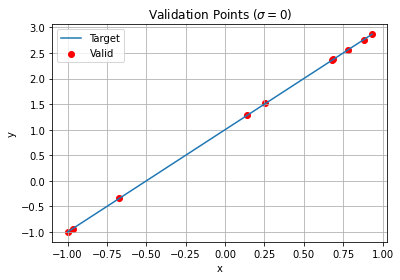

In [ ]:
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure()
plt.plot(x_valid, y_target,label='Target')
plt.scatter(x_valid, y_valid, color='r',label='Valid')
plt.title('Validation Points $(\sigma=0)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
4/4 [==============================] - 0s 22ms/step - loss: 4.3419 - mse: 4.3419 - val_loss: 7.6351 - val_mse: 7.6351
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 4.0637 - mse: 4.0637 - val_loss: 7.0906 - val_mse: 7.0906
Epoch 3/20
4/4 [==============================] - 0s 8ms/step - loss: 3.7760 - mse: 3.7760 - val_loss: 6.6769 - val_mse: 6.6769
Epoch 4/20
4/4 [==============================] - 0s 8ms/step - loss: 3.5590 - mse: 3.5590 - val_loss: 6.2800 - val_mse: 6.2800
Epoch 5/20
4/4 [==============================] - 0s 8ms/step - loss: 3.3473 - mse: 3.3473 - val_loss: 5.8789 - val_mse: 5.8789
Epoch 6/20
4/4 [==============================] - 0s 8ms/step - loss: 3.1368 - mse: 3.1368 - val_loss: 5.4984 - val_mse: 5.4984
Epoch 7/20
4/4 [==============================] - 0s 8ms/step - loss: 2.9369 - mse: 2.9369 - val_loss: 5.1214 - val_mse: 5.1214
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 2.7396 - mse: 2.7396 - val_loss: 

In [ ]:
# return weights
model.get_weights()

[array([[0.06828573]], dtype=float32), array([0.7566982], dtype=float32)]

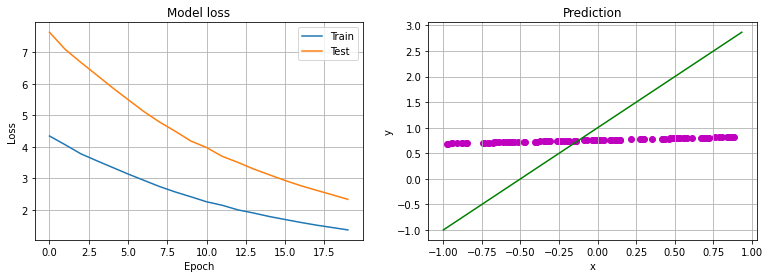

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.subplot(132)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Come mi potevo aspettare dal basso numero di epoche utilizzate, il grado di precisione della rete neurale risulta tutt'altro che soddisfacente, in quanto non si è dato al programma il tempo necessario per performare in modo efficace il fit lineare dei dati.

Nella seconda simulazione ho quindi aumentato il numero di epoche, portandole a $N_{epoch} = 70$.

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=70,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/70
4/4 [==============================] - 0s 21ms/step - loss: 5.2974 - mse: 5.2974 - val_loss: 9.2000 - val_mse: 9.2000
Epoch 2/70
4/4 [==============================] - 0s 8ms/step - loss: 4.9098 - mse: 4.9098 - val_loss: 8.7176 - val_mse: 8.7176
Epoch 3/70
4/4 [==============================] - 0s 8ms/step - loss: 4.6545 - mse: 4.6545 - val_loss: 8.2477 - val_mse: 8.2477
Epoch 4/70
4/4 [==============================] - 0s 8ms/step - loss: 4.4035 - mse: 4.4035 - val_loss: 7.7157 - val_mse: 7.7157
Epoch 5/70
4/4 [==============================] - 0s 9ms/step - loss: 4.1279 - mse: 4.1279 - val_loss: 7.2323 - val_mse: 7.2323
Epoch 6/70
4/4 [==============================] - 0s 8ms/step - loss: 3.8693 - mse: 3.8693 - val_loss: 6.5949 - val_mse: 6.5949
Epoch 7/70
4/4 [==============================] - 0s 8ms/step - loss: 3.5463 - mse: 3.5463 - val_loss: 6.1865 - val_mse: 6.1865
Epoch 8/70
4/4 [==============================] - 0s 9ms/step - loss: 3.3370 - mse: 3.3370 - val_loss: 

In [ ]:
# return weights
model.get_weights()

[array([[1.4587255]], dtype=float32), array([0.96434593], dtype=float32)]

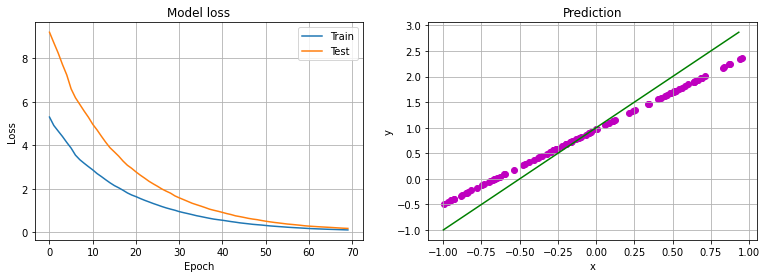

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.subplot(132)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Vediamo come, una volta aumentato il numero di epoche, la macchina diventa in grado di migliorare l'efficienza della capacità predittiva, arrivando a fittare i dati di test con un andamento lineare molto prossimo a quello atteso. E' inoltre importante porre l'accento su un'altra caratteristica delle reti neurali finora trascurata, ovvero l'andamento della funzione costo MSE al crescere del numero di epoche. A lezione abbiamo infatti visto che, mentre la MSE relativa ai dati di training presenta un andamento monotono decrescente, l'errore quadratico medio associato al campione di validation (o errore di generalizzazione), dopo un iniziale andamento descrescente, è caratterizzato dalla presenza di un punto stazionario (*early-stopping point*), in particolare un minimo globale, oltre il quale comincia a crescere insieme al numero di epoche. Questo comportanto identifica il raggiungimento, da parte del programma, di una fase di overfitting dei dati. Chiaramente per garantire l'efficienza del processo di fitting della NN, è indispensabile monitorare l'andamento della MSE in modo da essere in grado di arrestare l'esecuzione del programma una volta raggiunto l'early-stopping point.

Per ottenere un fit lineare ancora più preciso ho quindi dovuto, non solo aumentare nuovamente il numero di epoche di simulazione, in particolare ho fissato $N_{epoch} = 200$, ma è stato anche necessario monitorare l'andamento della funzione di loss relativa ai dati di test per evitare l'overfitting del campione.

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/200
4/4 [==============================] - 0s 21ms/step - loss: 1.0547 - mse: 1.0547 - val_loss: 1.2794 - val_mse: 1.2794
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.9137 - mse: 0.9137 - val_loss: 1.1212 - val_mse: 1.1212
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 0.7890 - mse: 0.7890 - val_loss: 0.9914 - val_mse: 0.9914
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6863 - mse: 0.6863 - val_loss: 0.8653 - val_mse: 0.8653
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.5905 - mse: 0.5905 - val_loss: 0.7562 - val_mse: 0.7562
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.5095 - mse: 0.5095 - val_loss: 0.6722 - val_mse: 0.6722
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.4455 - mse: 0.4455 - val_loss: 0.6041 - val_mse: 0.6041
Epoch 8/200
4/4 [==============================] - 0s 8ms/step - loss: 0.3952 - mse: 0.3952 - va

In [ ]:
# return weights
model.get_weights()

[array([[1.996986]], dtype=float32), array([0.99986523], dtype=float32)]

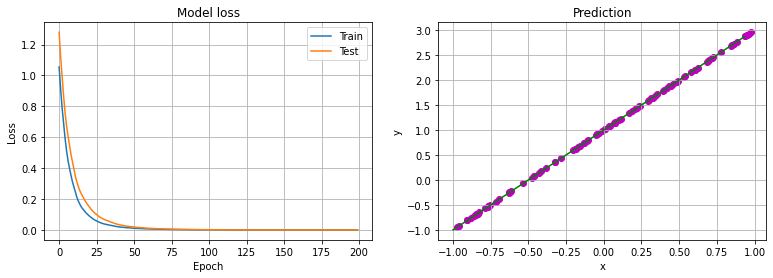

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.subplot(132)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Dai grafici soprariportati possiamo sia osservare l'efficienza raggiunta dalle predizioni fatte dal programma (a destra), sia verificare che il processo di fit abbia funzionato correttamente (a sinistra). Come detto sopra, ciò può essere dedotto dall'andamento monotono descrescente assunto dalla funzione costo relativa al campione di test.

Infine, l'ultima parte del primo esercizio consisteva nell'operare un processo di fitting su un campione di dati affetto da rumore gaussiano ($\sigma \neq 0$). Nello specifico, ho generato due campioni caratterizzati rispettivamente da $\sigma = 0.2$  e $\sigma = 0.5$, e ho poi cercato di migliorare l'efficienza della rete neurale variandone i parametri $N_{train}$, $N_{valid}$ e $N_{epoch}$. Nello specchietto Python sottostante, ho riportato due plot che mostrano l'andamento dei dati di validation utilizzati.

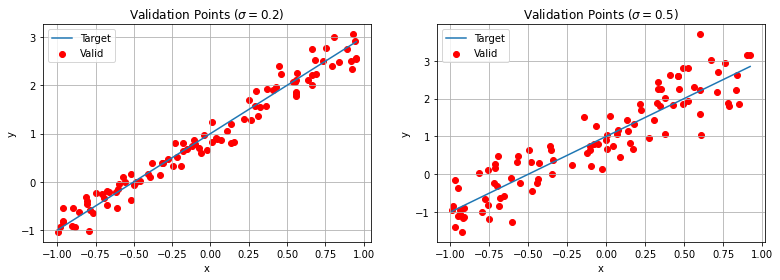

In [ ]:
x0_train = np.random.uniform(-1, 1, 500)
x0_valid = np.random.uniform(-1, 1, 100)
x0_valid.sort()
y0_target = m * x0_valid + b # ideal (target) linear function

x1_train = np.random.uniform(-1, 1, 700)
x1_valid = np.random.uniform(-1, 1, 100)
x1_valid.sort()
y1_target = m * x1_valid + b # ideal (target) linear function

sigma = 0.2
y0_train = np.random.normal(m * x0_train + b, sigma) # actual measures from which we want to guess regression parameters
y0_valid = np.random.normal(m * x0_valid + b, sigma)

sigma = 0.5
y1_train = np.random.normal(m * x1_train + b, sigma) # actual measures from which we want to guess regression parameters
y1_valid = np.random.normal(m * x1_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(x0_valid, y0_target,label='Target')
plt.scatter(x0_valid, y0_valid, color='r',label='Valid')
plt.title('Validation Points $(\sigma=0.2)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.plot(x1_valid, y1_target,label='Target')
plt.scatter(x1_valid, y1_valid, color='r',label='Valid')
plt.title('Validation Points $(\sigma=0.5)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

Nel caso $\sigma = 0.2$, ho deciso di fissare $N_{train} = 500$, $N_{valid} = 100$ e $N_{epoch} = 50$. Di seguito sono riportati i risultati della simulazione.

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x0_train, y=y0_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x0_valid, y0_valid))

Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 2.6891 - mse: 2.6891 - val_loss: 2.0330 - val_mse: 2.0330
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.9639 - mse: 1.9639 - val_loss: 1.5120 - val_mse: 1.5120
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 1.4740 - mse: 1.4740 - val_loss: 1.1572 - val_mse: 1.1572
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1353 - mse: 1.1353 - val_loss: 0.9038 - val_mse: 0.9038
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8917 - mse: 0.8917 - val_loss: 0.7158 - val_mse: 0.7158
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7089 - mse: 0.7089 - val_loss: 0.5738 - val_mse: 0.5738
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.4638 - val_mse: 0.4638
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4633 - mse: 0.46

In [ ]:
# return weights
model.get_weights()

[array([[1.979564]], dtype=float32), array([0.9965393], dtype=float32)]

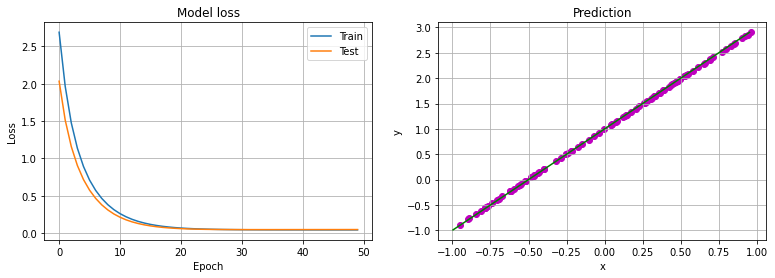

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x0_predicted = np.random.uniform(-1, 1, 100)
y0_predicted = model.predict(x0_predicted)
plt.subplot(132)
plt.scatter(x0_predicted, y0_predicted,color='m',label='Prediction')
plt.plot(x0_valid, y0_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Per $\sigma = 0.5$, ho invece utilizzato $N_{train} = 700$, $N_{valid} = 100$ e $N_{epoch} = 70$.

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x1_train, y=y1_train, 
          batch_size=32, epochs=70,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x1_valid, y1_valid))

Epoch 1/70
22/22 [==============================] - 0s 5ms/step - loss: 3.0904 - mse: 3.0904 - val_loss: 2.6058 - val_mse: 2.6058
Epoch 2/70
22/22 [==============================] - 0s 3ms/step - loss: 2.2286 - mse: 2.2286 - val_loss: 1.9647 - val_mse: 1.9647
Epoch 3/70
22/22 [==============================] - 0s 3ms/step - loss: 1.6760 - mse: 1.6760 - val_loss: 1.5278 - val_mse: 1.5278
Epoch 4/70
22/22 [==============================] - 0s 3ms/step - loss: 1.2988 - mse: 1.2988 - val_loss: 1.2135 - val_mse: 1.2135
Epoch 5/70
22/22 [==============================] - 0s 3ms/step - loss: 1.0295 - mse: 1.0295 - val_loss: 0.9815 - val_mse: 0.9815
Epoch 6/70
22/22 [==============================] - 0s 3ms/step - loss: 0.8329 - mse: 0.8329 - val_loss: 0.8073 - val_mse: 0.8073
Epoch 7/70
22/22 [==============================] - 0s 3ms/step - loss: 0.6876 - mse: 0.6876 - val_loss: 0.6754 - val_mse: 0.6754
Epoch 8/70
22/22 [==============================] - 0s 3ms/step - loss: 0.5785 - mse: 0.57

In [ ]:
# return weights
model.get_weights()

[array([[1.9852631]], dtype=float32), array([1.0146827], dtype=float32)]

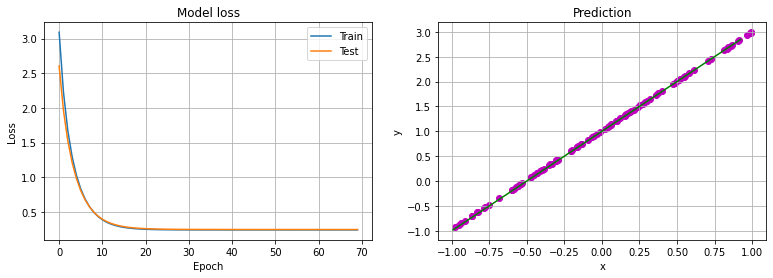

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

x1_predicted = np.random.uniform(-1, 1, 100)
y1_predicted = model.predict(x1_predicted)
plt.subplot(132)
plt.scatter(x1_predicted, y1_predicted,color='m',label='Prediction')
plt.plot(x1_valid, y1_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

Dal confronto dei risultati ottenuti fittando i due campioni, caratterizzati rispettivamente da $\sigma = 0.2$  e $\sigma = 0.5$, emerge un'importante, sebbene piuttosto intuitiva, proprietà delle NN: più il dataset fornito in input è affetto da rumore di fondo, più il processo di fitting, per operare al meglio, richiederà una simulazione massiccia, costituita da un numero sempre maggiore di epoche e di dati su cui fare training.

### <span style="color:darkorange"> Esercizio 11.2</span>

Il secondo esercizio consisteva invece nella costruzione di una rete neurale in grado di performare il fit di un campione di dati distribuiti secondo una funzione $f(x)$, descritta da un andamento polinomiale di terzo grado:

$$
f(x)=4-3x-2x^2+3x^3
$$

Per eseguire la simulazione ho estratto uniformemente un dataset $(x,y)$ di $N_{train} = 900$ e $N_{valid} = 90$, con $x \in [-1,1]$ mentre la coordinata $y$ è stata disturbata con un rumore gaussiano di ampiezza $\sigma = 0.2$.

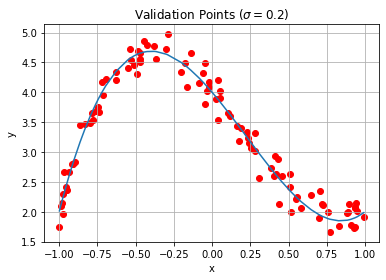

In [ ]:
# target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
def pol(x):  # defining the fitting function
    a = 3
    b = -2
    c = -3
    d = 4
    return a*x**3 + b*x**2 + c*x + d

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = pol(x_valid) # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(pol(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(pol(x_valid), sigma)

plt.plot(x_valid, y_target,label='Target')
plt.scatter(x_valid, y_valid, color='r',label='Valid')
plt.title('Validation Points $(\sigma=0.2)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Di seguito è riportata la struttura della prima rete neurale utilizzata per svolgere il fit. Nello specifico, ho inserito unicamente layer densi, ovvero completamente interconnessi, e ho impostato come funzione di attivazione la *selu*, come ottimizzatore l'*adam* e come funzione costo la *Mean Squared Logarithmic Error* (MSLE).

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(1,), activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(1, activation='selu'))

model.compile(optimizer='adam', loss='msle', metrics=['mse'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_84 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_85 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_86 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_87 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
_________________________________________________

Il processo di fit è stato eseguito con $N_{epoch} = 200$.

In [ ]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=200,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/200
32/32 [==============================] - 0s 6ms/step - loss: 0.5036 - mse: 5.7572 - val_loss: 0.0661 - val_mse: 1.1263
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0266 - mse: 0.5062 - val_loss: 0.0181 - val_mse: 0.3092
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0106 - mse: 0.1932 - val_loss: 0.0134 - val_mse: 0.2003
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0071 - mse: 0.1241 - val_loss: 0.0082 - val_mse: 0.1198
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0055 - mse: 0.0926 - val_loss: 0.0073 - val_mse: 0.0983
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0770 - val_loss: 0.0073 - val_mse: 0.0961
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0651 - val_loss: 0.0042 - val_mse: 0.0689
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0042 - m

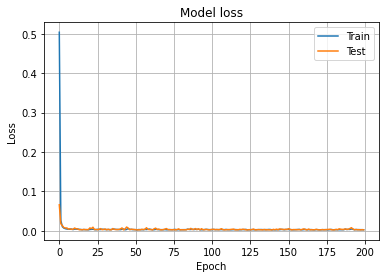

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

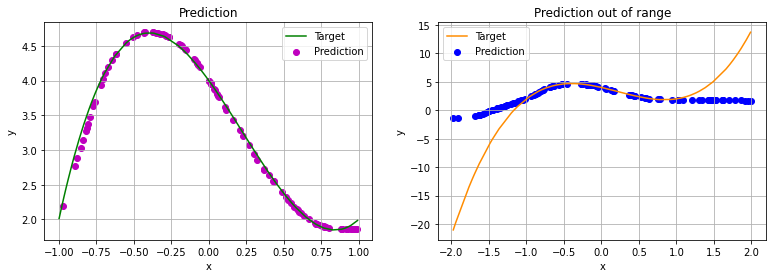

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(132)
x = np.random.uniform(-2, 2, 100)
x.sort()
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='b',label='Prediction')
plt.plot(x, pol(x),color='darkorange',label='Target')
plt.title('Prediction out of range')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

I plot soprariportati mostrano le predizioni generate dalla rete neurale rispettivamente su un campione di dati $x$ estratti uniformemente nell'intervallo $[-1,1]$, e nell'intervallo $[-2,2]$. E' istruttivo osservare come, nonostante la capacità predittiva del codice sia diventata sufficientemente alta da riuscire a stimare, almeno a grandi linee, l'andamento esatto della funzione nell'intervallo $[-1,1]$, la NN non è in grado di predire l'andamento della funzione di partenza al di fuori di tale range, in corrispondenza del quale è stata eseguita la fase di training. Un'ultima osservazione che possiamo fare riguarda l'andamento delle predizioni vicino all'estremo destro dell'intervallo, in corrispondenza del quale la funzione $f(x)$ ammette minimo e quindi la curvatura si fa più marcata: vediamo infatti come le predizioni tendano a discostarsi visibilmente dall'andamento atteso. A priori, ci aspettiamo che ciò possa essere risolto semplicemente aumentando il numero di parametri liberi da ottimizzare, in modo da permettere al codice di performare fit sempre più precisi di funzioni con andamenti complessi. Lo stesso risultato si potrebbe chiaramente ottenere aumentando le dimensioni del dataset di training.

Successivamente ho svolto un'ulteriore simulazione modificando alcune proprietà della rete neurale, ma lasciando la sua struttura inalterata, ovvero ho fissato lo stesso numero di layer e neuroni del caso precedente. Questa volta, ho utilizzato la funzione di attivazione *softplus*, mentre come ottimizzatore e funzione costo ho impostato rispettivamente *nadam* e *logcosh*.

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(1,), activation='softplus'))
model.add(Dense(100, activation='softplus'))
model.add(Dense(100, activation='softplus'))
model.add(Dense(100, activation='softplus'))
model.add(Dense(100, activation='softplus'))
model.add(Dense(1, activation='softplus'))

model.compile(optimizer='nadam', loss='logcosh', metrics=['logcosh'])

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_90 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_91 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_92 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_93 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
_________________________________________________

In [ ]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=200,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/200
32/32 [==============================] - 0s 6ms/step - loss: 0.5749 - logcosh: 0.5749 - val_loss: 0.4387 - val_logcosh: 0.4387
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4528 - logcosh: 0.4528 - val_loss: 0.3789 - val_logcosh: 0.3789
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4092 - logcosh: 0.4092 - val_loss: 0.3956 - val_logcosh: 0.3956
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3624 - logcosh: 0.3624 - val_loss: 0.3095 - val_logcosh: 0.3095
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2961 - logcosh: 0.2961 - val_loss: 0.3329 - val_logcosh: 0.3329
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3043 - logcosh: 0.3043 - val_loss: 0.3332 - val_logcosh: 0.3332
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2596 - logcosh: 0.2596 - val_loss: 0.5751 - val_logcosh: 0.5751
Epoch 8/200
32/32 [========

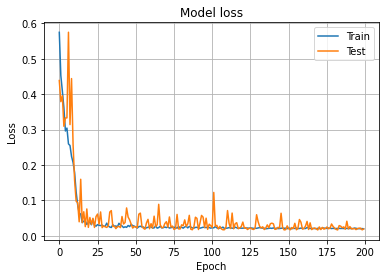

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

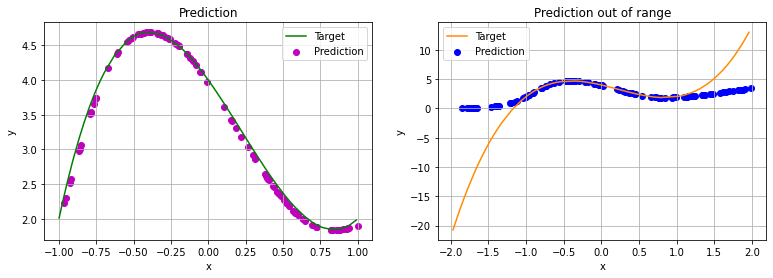

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(132)
x = np.random.uniform(-2, 2, 100)
x.sort()
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='b',label='Prediction')
plt.plot(x, pol(x),color='darkorange',label='Target')
plt.title('Prediction out of range')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

Dal plot di sinistra possiamo osservare come le predizioni della NN tendano a descrivere un andamento molto simile a quello atteso. Dal grafico di destra, vediamo invece come, nuovamente, la rete neurale non sembri in grado di fornire predizioni coerenti con l'andamento reale di $f(x)$ al di fuori del range da cui è stato estrapolato il dataset di training.

Infine, ho eseguito un'ulteriore simulazione per la quale ho deciso di aumentare, rispetto ai casi precedenti, la complessità della rete neurale, e quindi il numero di layer e neuroni. Questa volta ho inoltre scelto di utilizzare *elu* come funzione di attivazione, *adamax* come ottimizzatore e *Mean Absolute Error* (MAE) come funzione costo.

In [ ]:
model = Sequential()
model.add(Dense(150, input_shape=(1,), activation='elu'))
model.add(Dense(120, activation='elu'))
model.add(Dense(120, activation='elu'))
model.add(Dense(120, activation='elu'))
model.add(Dense(100, activation='elu'))
model.add(Dense(100, activation='elu'))
model.add(Dense(100, activation='elu'))
model.add(Dense(1, activation='elu'))

model.compile(optimizer='adamax', loss='mae', metrics=['mae'])

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 150)               300       
_________________________________________________________________
dense_117 (Dense)            (None, 120)               18120     
_________________________________________________________________
dense_118 (Dense)            (None, 120)               14520     
_________________________________________________________________
dense_119 (Dense)            (None, 120)               14520     
_________________________________________________________________
dense_120 (Dense)            (None, 100)               12100     
_________________________________________________________________
dense_121 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_122 (Dense)            (None, 100)             

In [ ]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=200,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/200
32/32 [==============================] - 0s 6ms/step - loss: 1.7379 - mae: 1.7379 - val_loss: 0.6286 - val_mae: 0.6286
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5441 - mae: 0.5441 - val_loss: 0.6281 - val_mae: 0.6281
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4810 - mae: 0.4810 - val_loss: 0.4971 - val_mae: 0.4971
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4034 - mae: 0.4034 - val_loss: 0.4033 - val_mae: 0.4033
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2789 - mae: 0.2789 - val_loss: 0.4214 - val_mae: 0.4214
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2440 - mae: 0.2440 - val_loss: 0.2317 - val_mae: 0.2317
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2113 - mae: 0.2113 - val_loss: 0.2505 - val_mae: 0.2505
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2071 - m

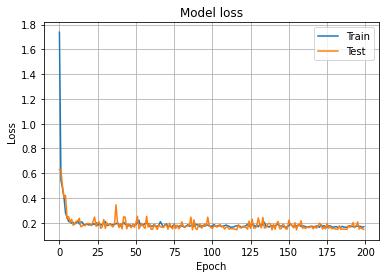

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

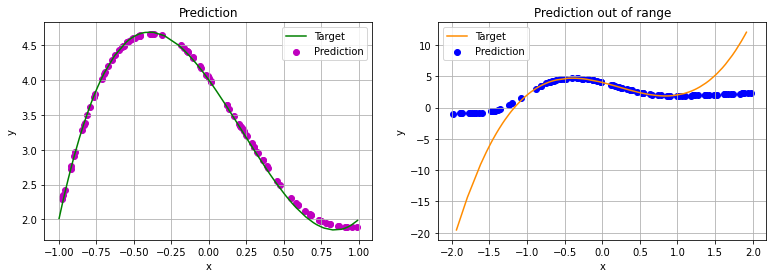

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='m',label='Prediction')
plt.plot(x_valid, y_target,color='g',label='Target')
plt.title('Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(132)
x = np.random.uniform(-2, 2, 100)
x.sort()
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='b',label='Prediction')
plt.plot(x, pol(x),color='darkorange',label='Target')
plt.title('Prediction out of range')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

Il grafico di sinistra ci permette di corroborare l'ipotesi esposta sopra, ovvero il fatto che, aumentando la complessità della rete neurale, e quindi il numero di parametri da ottimizzare, la NN diventi in grado di estrapolare dalla fase di training un fit, e di conseguenza un modello predittivo, sempre più preciso e accurato, in accordo con quanto osservato dal plot. Ovviamente, questo ragionamento continua a valere solo se il numero di epoche rimane sufficientemente basso da non permettere al programma di raggiungere la fase di overfittig dei dati. A destra abbiamo invece un'ulteriore conferma che la capacità predittiva di una rete neurale mantiene la sua efficienza solo all'interno del range di training, non permettendoci in alcun modo di prevedere l'esatto andamento al di fuori di tale intervallo.

### <span style="color:darkorange"> Esercizio 11.3</span>

All'interno del terzo esercizio, ho dovuto implementare una NN in grado di performare il fit di dati distribuiti in uno spazio tridimensionale secondo una semplice funzione trigonometrica 2D:

$$f(x,y) = \sin(x^2+y^2)$$

Prima di tutto ho generato un dataset $(x,y,z)$ di $N_{train} = 5000$ e $N_{valid} = 500$, con $(x,y) \in [-1.5,1.5] \times [-1.5,1.5]$, mentre la coordinata $z$ è stata ottenuta sovrapponendo la funzione $f(x,y)$ con rumore gaussiano di ampiezza $\sigma = 0.1$. Nel pannello sottostante ho riportato due plot che mostrano sia la distribuzione esatta dei punti $(x,y,f(x,y))$ (sopra), sia i punti associati ai dati di validation $(x,y,z)$ (sotto).

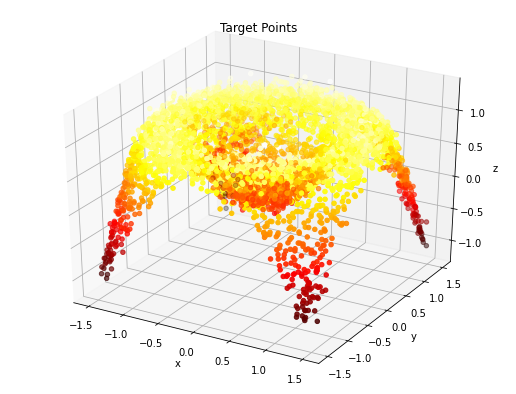

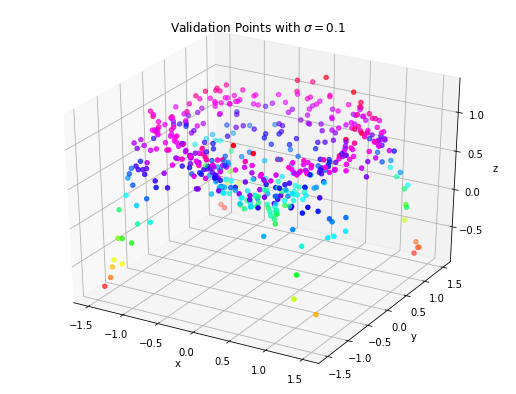

In [ ]:
def f(x,y):
    return np.sin(x**2 + y**2)

from mpl_toolkits import mplot3d

# generate training inputs
np.random.seed(0)

n_train = 5000
n_valid = 500

x_train = np.zeros((n_train,2))
x_valid = np.zeros((n_valid,2))

x_train[:,0] = np.random.uniform(-1.5, 1.5, n_train)
x_valid[:,0] = np.random.uniform(-1.5, 1.5, n_valid)
x_train[:,1] = np.random.uniform(-1.5, 1.5, n_train)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, n_valid)

y_target = f(x_valid[:,0],x_valid[:,1]) # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(f(x_train[:,0],x_train[:,1]), sigma)
y_valid = np.random.normal(f(x_valid[:,0],x_valid[:,1]), sigma)

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')
ax.set_title('Target Points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(x_train[:,0], x_train[:,1], y_train, c=y_train, cmap='hot');

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')
ax.set_title('Validation Points with $\sigma = 0.1$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(x_valid[:,0], x_valid[:,1], y_valid, c=y_valid, cmap='hsv');

In virtù della maggiore complessità del problema, è stato necessario implementare una rete neurale più massiccia delle precedenti. La struttura della NN, utilizzata a questo scopo, è riportata nello specchietto sottostante.

In [ ]:
model = Sequential()
model.add(Dense(200, input_shape=(2,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(120, activation='elu'))
model.add(Dense(100, activation='elu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(50, activation='softplus'))
model.add(Dense(1, activation='softplus'))

model.compile(optimizer='adamax', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_65 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_66 (Dense)             (None, 120)               12120     
_________________________________________________________________
dense_67 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_68 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_69 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_70 (Dense)             (None, 50)              

In [ ]:
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
157/157 [==============================] - 0s 3ms/step - loss: 0.1486 - mse: 0.1486 - val_loss: 0.1207 - val_mse: 0.1207
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106 - val_loss: 0.0806 - val_mse: 0.0806
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 4/100
157/157 [==============================] - 0s 3ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 7/100
157/157 [==============================] - 0s 3ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - 

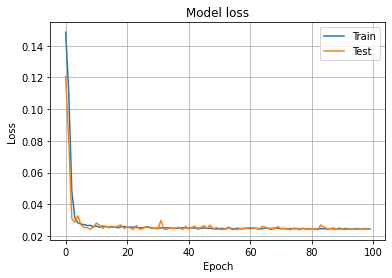

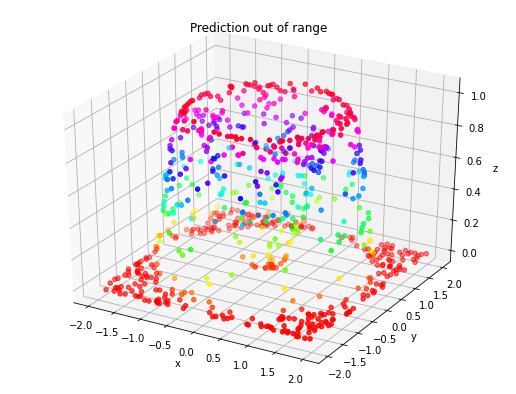

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

fig = plt.figure(figsize=(9, 7))
x_predicted = np.zeros((800,2))
x_predicted[:,0] = np.random.uniform(-2, 2, 800)
x_predicted[:,1] = np.random.uniform(-2, 2, 800)

y_predicted = model.predict(x_predicted)
ax = plt.axes(projection='3d')
ax.set_title('Prediction out of range')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(x_predicted[:,0], x_predicted[:,1], y_predicted, c=y_predicted, cmap='hsv');

plt.show()

Dal secondo plot, possiamo notare come l'andamento predetto dalla mia NN sia molto vicino a quello atteso, almeno per quanto riguarda la regione centrale dell'intervallo $[-1.5,1.5] \times [-1.5,1.5]$. Al contrario, è istruttivo osservare come, nonostante si sia utilizzato un dataset di training relativamente corposo $(N_{train} = 9000)$ ed un numero di epoche alto $(N_{epoch} = 900)$, la rete neurale non sia comunque in grado di fornire predizioni accurate in prossimità degli estremi del range di training e al suo esterno. Vediamo infatti che tali punti tendono a giacere sul piano $z=0$.